### 統計學習與深度學習 (Fall, 2025)
### Homework 2

請將IPYNB檔與IPYNB Export之HTML檔上傳至COOL作業區。作業自己做。嚴禁抄襲。不接受紙本繳交，不接受遲交。請以英文或中文作答。
如無其他規定，所有重要結果應顯示至小數點第四位(四捨五入)。本次作業禁止使用Auto-SKlearn或其他AutoML工具。題目可能有額外實作限制。違反規定者該題以零分計算。


### 第一題[Logistic Regression: Probability, Loss, Gradient, and Weights]

Logistic regression (LR) 是一個常用的分類模型。我們將在這個題目中透過練習熟悉一些LR的細節與特性。

本題將利用UCI的"Adult" dataset <https://archive.ics.uci.edu/ml/datasets/Adult>來練習資料前處理。我們使用這個資料集的方式是用來建構預測最後一個收入欄位是'>50K'或'<=50K'。這個資料集已經先切好了Training跟Test。Training又切分為Subtraining與Validation兩個不重疊的集合。

請直接使用作業附帶的資料檔 **adult_m50kv2.pickle**。讀取的方式為:

In [40]:
import pickle
dsfile = 'adult_m50kv2.pickle'
with open(dsfile, 'rb') as fh1:
    adult50kp = pickle.load(fh1)

這是一個Dictionary結構，Keys有:

In [41]:
adult50kp.keys()

dict_keys(['x_train', 'y_train', 'x_test', 'y_test', 'columnname', 'num_col', 'x_subtrain', 'x_subvalid', 'y_subtrain', 'y_subvalid', 'x_subtrain_ib', 'y_subtrain_ib'])

其中x_train與y_train為訓練資料，x_test與y_test為測試資料，columname為欄位名稱，
x_subtrain與y_subtrain為Subtraining, x_subvalid與y_subvalid為validation資料集。

本題的任務如下:

**第一小題** (10%): 實作一個pred_prob函數。這個函數的輸入為資料矩陣、LR的常數項係數與特徵係數，輸出在給定係數下LR對各資料點預測屬於各Class的機率。本題為Binary Classification, 因此第一個Column為Class 0, 第二個Column為Class 1的機率。一般而言，Class 1稱為Postive Class, Class 0 稱為Negative Class。本題>50K為Positive Class。本題禁止直接使用sklearn中的實作。你應該使用Numpy建構此函數。然而，你可以參考sklearn中對此函數的定義<https://scikit-learn.org/1.5/modules/linear_model.html#binary-case>。你的實作應與此文件一致。

請使用下面Python函數定義:

```python
def pred_prob(X, intercept, coefs, twocol = True):
    # Implement your own probability function to predict 
    # the probability in binary logistic regression

```

其中`X`為特徵矩陣，每一個row為一筆資料，不包含常數項。
`intercept`為LR的常數項係數。
`coefs`為 K X 1 的係數Numpy向量。
`twocol`為 Boolean。如True則回傳的機率矩陣為N X 2, 第一個Column為P(Y=0 | X) 第二個Column為P(Y=1 | X)。如False則回傳N X 1矩陣的P(Y=1 | X)。



In [42]:
import numpy as np
def pred_prob(X, intercept, coefs, twocol=True):
    z = np.dot(X, coefs) + intercept
    
    p1 = 1 / (1 + np.exp(-z))  # sigmoid function
    if twocol:
        p0 = 1 - p1
        return np.hstack((p0, p1))
    else:
        return p1

**第二小題** (15%): 實作LR with L2 Regularization的Loss Function。

此Loss Function的定義如下

$\frac{1}{S} \sum_{i=1}^{n} -s_i(y_i log(p(X_i) + (1 - y_i) log(1 - p(X_i)) + \frac{1}{2} \frac{w^T w}{S \cdot  C}  $

其中$P(X_i)$為LR在目前參數下預測資料點$i$為Positive Class的機率。
$w$為參數向量(不包含常數項係數)。
$s_i$為資料點$i$的權重，$s_i = 1$。
$S = \sum_{i=1}^N s_i$。
$C$ 為Regularization Coefficient，數值越大則對係數的牽制越小(與課程投影片定義不同)。

本題禁止直接使用sklearn中的實作。你應該使用Numpy建構此函數。然而，你可以參考sklearn中對此函數的定義<https://scikit-learn.org/1.5/modules/linear_model.html#binary-case>。你的實作應與此文件一致。

請使用下面Python函數定義:

```python
def lr_logloss(Xtrain, ytrain, intercept, coefs, C):
    # Implement your own loss function for
    # Logistic Regression with L2 regularization
    
```

其中`Xtrain`為特徵矩陣，每一個row為一筆資料，不包含常數項。
`ytrain`為class label, 數值應為0或1。
`intercept`為LR的常數項係數。
`coefs`為 K X 1 的係數Numpy向量。
`C`為regularization coefficient。

In [43]:
def lr_logloss(XTrain, ytrain, intercept, coefs, C):
    """
    Ards:
        XTrain: n x d feature matrix
        ytrain: n x 1 label vector (0/1)
        intercept: scalar
        coefs: d x 1 coefficient vector
        C: regularization parameter
    Returns:
        log loss with L2 regularization
    """
    S = XTrain.shape[0]
    
    # Compute Log Loss
    p1 = pred_prob(XTrain, intercept, coefs, twocol=False)
    
    eplison = 1e-15
    p1 = np.clip(p1, eplison, 1 - eplison)
    
    ytrain_col = ytrain.reshape(-1, 1)
    
    log_loss_sum = -np.sum(ytrain_col * np.log(p1) + (1 - ytrain_col) * np.log(1 - p1))
    avrage_log_loss = log_loss_sum / S
    
    # L2 Regularization
    w_squared_sum = np.sum(coefs ** 2)
    l2_term = (0.5 * w_squared_sum) / (S * C)
    
    # Total Loss
    total_loss = avrage_log_loss + l2_term
    
    return total_loss
    

**第三小題** (10%): 

(1) 使用 sklearn.linear_model.LogisticRegression()與Sub-training 資料集學習LR參數，印出Intercept與各特徵名稱與係數。(2) 將學好的模型應用在Test Dataset，計算Accuracy, Recall, Precision, F1。可使用sklearn實作。務必在最後具體說明題目所要計算的數值。請勿只印出sklearn的output。

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 將需要的資料集從字典中取出
x_subtrain = adult50kp['x_subtrain']
y_subtrain = adult50kp['y_subtrain']
x_test = adult50kp['x_test']
y_test = adult50kp['y_test']
column_names = adult50kp['columnname']

# --- 2. 訓練 Logistic Regression 模型 ---
# 初始化模型，增加 max_iter 以確保模型收斂
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# 使用 sub-training 資料集來訓練模型
print("正在訓練模型...")
lr_model.fit(x_subtrain, y_subtrain)
print("模型訓練完成！\n")


# --- 3. 印出模型的 Intercept 與 Coefficients ---
# (1) 印出 Intercept (常數項/截距)
intercept_val = lr_model.intercept_[0]
print(f"Intercept (常數項): {intercept_val:.4f}\n")

# (2) 印出各特徵的名稱與係數
coefficients = lr_model.coef_[0]
print("特徵名稱與其對應的係數:")
print("-" * 30)
for feature, coef in zip(column_names, coefficients):
    print(f"{feature:<20}: {coef:>10.4f}")
print("-" * 30)


# --- 4. 在 Test Dataset 上進行預測與評估 ---
# 使用訓練好的模型對測試集進行預測
y_pred_test = lr_model.predict(x_test)

# 計算各項評估指標
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)


# --- 5. 具體回報計算出的數值 ---
print("\n模型在測試集上的評估結果 (Test Set Evaluation Results):")
print("=" * 50)
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-Score : {f1:.4f}")
print("=" * 50)

正在訓練模型...
模型訓練完成！

Intercept (常數項): -1.5029

特徵名稱與其對應的係數:
------------------------------
capital-loss        :     0.2566
hours-per-week      :     0.3527
capital-gain        :     2.3682
educational-num     :     0.6930
age                 :     0.3386
fnlwgt              :     0.0810
relationship_Husband:    -0.1697
relationship_Not-in-family:    -0.0530
relationship_Other-relative:    -0.7189
relationship_Own-child:    -1.1709
relationship_Unmarried:    -0.1586
relationship_Wife   :     1.1970
race_Amer-Indian-Eskimo:    -0.5780
race_Asian-Pac-Islander:     0.1654
race_Black          :    -0.2165
race_Other          :    -0.3840
race_White          :    -0.0610
gender_Female       :    -0.9933
gender_Male         :    -0.0808
occupation_Adm-clerical:     0.0280
occupation_Craft-repair:     0.0731
occupation_Exec-managerial:     0.8506
occupation_Farming-fishing:    -0.9402
occupation_Handlers-cleaners:    -0.6231
occupation_Machine-op-inspct:    -0.2472
occupation_Other-service:    

**第四小題** (10%): Loss function visualization。

基於前一小題學習出的係數，(1) 畫出在目前 Intercept 附近一單位的 Loss Function (2) 畫出在目前係數零(capital-loss)附近一單位的 Loss Function。

注意: 由於前一個小題學習出的係數已經對 Loss Function 最小化，你畫出的圖應該都是 U 形曲線。


模型找到的最佳 Intercept: -1.5029


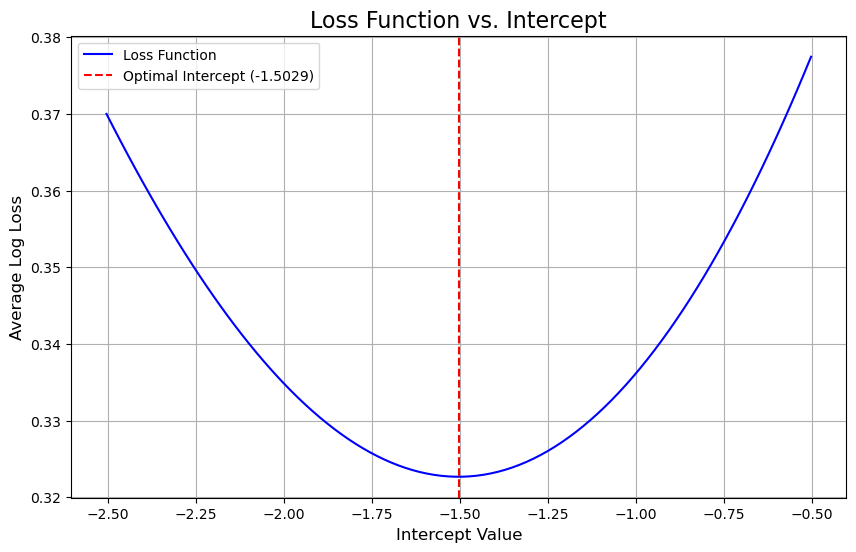


模型找到的最佳 'capital-loss' 係數: 0.2566


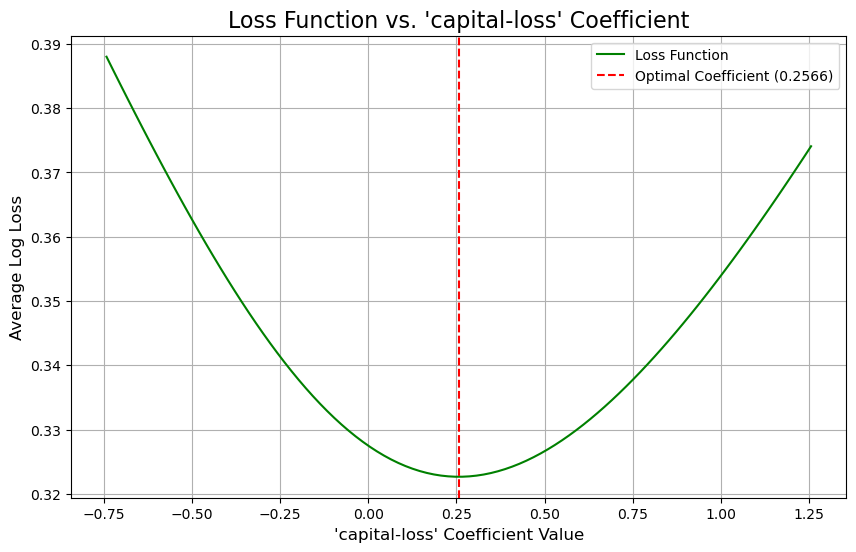

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# --- 準備工作 ---
# 假設 lr_model, x_subtrain, y_subtrain, column_names 已經從您的上一段程式碼中成功執行並存在於記憶體中。

# 為了繪圖，我們需要一個能夠根據任意參數計算損失的函式。
# 這個版本只計算核心的 Log Loss，以最直接的方式驗證 scikit-learn 找到的最佳解。
def pred_prob_for_plot(X, intercept, coefs):
    """根據給定的參數計算 Class 1 的機率"""
    z = np.dot(X, coefs) + intercept
    return 1 / (1 + np.exp(-z))

def logloss_for_plot(Xtrain, ytrain, intercept, coefs):
    """根據給定的參數計算平均 Log Loss"""
    num_samples = Xtrain.shape[0]
    p1 = pred_prob_for_plot(Xtrain, intercept, coefs)
    
    # 為了數值穩定性，避免 log(0) 導致的錯誤
    epsilon = 1e-15
    p1 = np.clip(p1, epsilon, 1 - epsilon)
    
    ytrain_col = ytrain.reshape(-1, 1)
    
    # 計算平均 Log Loss
    average_log_loss = -np.sum(ytrain_col * np.log(p1) + (1 - ytrain_col) * np.log(1 - p1)) / num_samples
    return average_log_loss

# --- 主要執行區塊 ---

# 1. 從已經訓練好的模型中取得最佳化的 Intercept 和 Coefficients
opt_intercept = lr_model.intercept_[0]
opt_coefs = lr_model.coef_[0].reshape(-1, 1)

print(f"模型找到的最佳 Intercept: {opt_intercept:.4f}")

# 2. (1) 畫出在目前 Intercept 附近一單位的 Loss Function
# 建立一個在最佳 Intercept 附近 ±1 的數值範圍
intercept_range = np.linspace(opt_intercept - 1, opt_intercept + 1, 100)
loss_values_intercept = []

# 固定係數，只變動 Intercept，並計算每個點對應的 Loss
for intercept_val in intercept_range:
    loss = logloss_for_plot(x_subtrain, y_subtrain, intercept_val, opt_coefs)
    loss_values_intercept.append(loss)

# 繪製圖表一
plt.figure(figsize=(10, 6))
plt.plot(intercept_range, loss_values_intercept, label='Loss Function', color='blue')
plt.axvline(x=opt_intercept, color='red', linestyle='--', label=f'Optimal Intercept ({opt_intercept:.4f})')
plt.title('Loss Function vs. Intercept', fontsize=16)
plt.xlabel('Intercept Value', fontsize=12)
plt.ylabel('Average Log Loss', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


# 3. (2) 畫出在目前係數零(capital-loss)附近一單位的 Loss Function
try:
    # 找到 'capital-loss' 特徵的索引 (column index)
    capital_loss_idx = np.where(column_names == 'capital-loss')[0][0]
    opt_coef_capital_loss = opt_coefs[capital_loss_idx][0]
    print(f"\n模型找到的最佳 'capital-loss' 係數: {opt_coef_capital_loss:.4f}")

    # 建立一個在最佳係數附近 ±1 的數值範圍
    coef_range = np.linspace(opt_coef_capital_loss - 1, opt_coef_capital_loss + 1, 100)
    loss_values_coef = []

    # 固定 Intercept 和其他係數，只變動 'capital-loss' 的係數
    for coef_val in coef_range:
        temp_coefs = opt_coefs.copy()
        temp_coefs[capital_loss_idx] = coef_val # 僅修改 'capital-loss' 的係數
        loss = logloss_for_plot(x_subtrain, y_subtrain, opt_intercept, temp_coefs)
        loss_values_coef.append(loss)

    # 繪製圖表二
    plt.figure(figsize=(10, 6))
    plt.plot(coef_range, loss_values_coef, label='Loss Function', color='green')
    plt.axvline(x=opt_coef_capital_loss, color='red', linestyle='--', label=f'Optimal Coefficient ({opt_coef_capital_loss:.4f})')
    plt.title("Loss Function vs. 'capital-loss' Coefficient", fontsize=16)
    plt.xlabel("'capital-loss' Coefficient Value", fontsize=12)
    plt.ylabel('Average Log Loss', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()

except (ValueError, NameError):
    print("\n[錯誤] 找不到 'capital-loss' 特徵或必要的變數。請確保您已先完整執行上一段程式碼來訓練 'lr_model'。")

#### Sanity Check

為了幫助同學們自我檢測正確性，在這裡提供幾個關鍵步驟的參考結果。

**第一小題**
```python
# load dataset
dsfile = 'adult_m50kv2.pickle'
with open(dsfile, 'rb') as fh1:
    adult50kp = pickle.load(fh1)

X = adult50kp['x_subtrain'][0:5,]
intercept = -1.5272275
coefs = [0.25950781,  0.34876602,  2.31873776 , 0.78736064,  0.33992389,  0.08704992,
  -0.43884149,  0.06617491, -0.86784172, -1.14138298, -0.0430126,   0.89943298,
  -0.91920029,  0.11168262, -0.20330975, -0.45255335, -0.06209014, -1.1973518,
  -0.32811911,  0.15581135,  0.23931349,  0.97771987, -0.80849467, -0.48881008,
  -0.05761483, -0.61597391, -3.01467409,  0.67615709,  0.82684249,  0.45561501,
   0.78515056,  0.10471469,  0.03536166, -0.18042056, -0.1981496,   0.89739856,
   0.72133736,  0.19974049,  0.02431812, -0.54957554, -0.23797782, -0.19134163,
  -0.08962951, -0.13136345, -0.14984098, -1.82034863,  0.22178759, -0.07676697,
   1.5654472,   0.4801181,  -0.45519986, -2.16013255,  0.56715199, -1.36568413,
  -0.26013768, -0.34160994,  0.30455591,  0.98946547,  0.83849021, -0.55428539,
  -0.01931975,  0.02875685, -0.22012367,  0.165938,    0.24587743, -0.49584621,
   0.27129184,  0.6632467,   1.08311314,  0.355352,    0.23657114, -0.55244221,
  -0.29776791, -0.51492492, -1.08493494, -0.83233382,  0.61660701,  0.38077523,
   0.34522743,  0.10493796,  0.16957889, -0.91882431, -0.07844291, -0.12138313,
  -0.13627414,  0.437241,   -1.40284695,  0.43730002,  0.64656827, -0.12873123,
   0.12363191,  0.30820418, -0.37598606, -0.2384826,  -1.86067539, -0.92314978,
   2.17438484,  1.28232608, -1.05960696, -1.35676708, -0.99932736, -0.64333065]

coefs = np.array(coefs)
coefs = coefs.reshape((-1, 1))
pred_prob(X, intercept, coefs)
```
Output:
```
array([[0.85699649, 0.14300351],
       [0.84396404, 0.15603596],
       [0.54792834, 0.45207166],
       [0.99604068, 0.00395932],
       [0.91956486, 0.08043514]])
```


**第二小題**

```python
Xtrain = adult50kp['x_subtrain']
ytrain = adult50kp['y_subtrain']
lr_logloss(Xtrain, ytrain, intercept, coefs, 1000)
```

Output:
```
0.32275140356935755
```

### (30%) 第二題[Model Evaluation with ROC / AUC]


在這一題中，請你練習實作 ROC 曲線與 AUC 的計算，並透過 Validation set 選出最佳的 threshold，最後在 Test set 上回報各項分類指標。禁止使用 `sklearn.metrics.roc_curve`、`sklearn.metrics.auc` 等現成函式，你必須自行實作相關計算。允許使用的套件包括 `numpy`、`pandas`、`matplotlib`，以及 `sklearn.linear_model.LogisticRegression`（僅能用於模型訓練與取得 `predict_proba` 輸出）。資料請使用與第一題相同的 `adult_m50kv2.pickle`，其中提供 subtrain、subvalid 與 test 的分割。

(10%) (1) 在 subtrain 上訓練一個 logistic regression 模型，並利用 validation set 的 `predict_proba` 輸出計算 ROC 曲線。請自行撰寫函式，掃描一系列 threshold，計算出對應的 TPR 與 FPR，繪製 ROC curve，並標出隨機猜測的對角線。你需要額外列印前五個 threshold 的數值及其 TPR、FPR 以供檢查。

(10%) (2) AUC 計算

根據前一小題得到的 ROC 點列，自行使用梯形法則 (trapezoidal rule) 計算 AUC，並輸出。

**補充說明**：AUC（Area Under the ROC Curve）是 ROC 曲線下方的面積，代表分類器對樣本排序的能力。實際上，這個面積無法用單一公式直接計算，因此我們通常將 ROC 曲線看作由一系列離散點組成，然後用 **梯形法則 (trapezoidal rule)** 來近似積分。其核心想法是將相鄰的兩個點 $(f_i, t_i)$、$(f_{i+1}, t_{i+1})$ 之間的面積近似為一個梯形，並將所有梯形的面積加總。

梯形法則計算 AUC 的公式為：

$$
\mathrm{AUC}\;\approx\;\sum_{i=0}^{n-1}\bigl(f_{i+1}-f_i\bigr)\cdot\frac{t_i+t_{i+1}}{2}
$$

其中：
- $f_i$：第 $i$ 個點的 False Positive Rate (FPR)
- $t_i$：第 $i$ 個點的 True Positive Rate (TPR)
- 點需依照 FPR 的遞增順序排列

請實作程式完成 AUC 的計算，並回報數值結果。

(10%) (3) 將 threshold 固定成 0.2，應用於 test set。請回報 Test set 上的 Accuracy、Precision、Recall 與 F1。


### 第三題 [Forward Feature Selection] 

注意: 本題禁用現成的Feature Selection Pipeline, 如sklearn.feature_selection.SelectFromModel()

(25%) Forward Feature Selection是一個常見的Model-based Feature Selection Method。方法在概念上單純，但在實作上各異。我們在這裡練習一個使用Train-Valid-Test Split的Forward Feature Selection作法。這個作法使用Validation Set決定要把那個Feature加入。並在Validation Set的Performance不再進步時即停止整個程序。

較詳細的作法如下:

* Let 𝑀_0 denote the null model (no predictors); M_k = the model with k predictors (i.e., features); p = number of features
* For Step k=0, 1, 2, …, 𝑝−1:
    * Consider all p - k models that augment the predictors in 𝑀_k with one additional predictor. For each possibility; compute the prediction performance (F1 score) on the validation set and select one with the best performance.
    * Stop if the best validation performance no longer increase.

本題的資料集由pickle file載入 (A Dictionary):
```python
# load dataset
dsfile = 'adult_m50kv2.pickle'
with open(dsfile, 'rb') as fh1:
    adult50kp = pickle.load(fh1)

```

* training set keys: x_subtrain, y_subtrain
* validation set keys: x_subvalid, y_subvalid
* test set keys: x_test, y_test

為了方便比較，請使用下面的 LR Learner: sklearn.linear_model.LogisticRegression(solver = 'lbfgs', C= 1000, max_iter = 1000, tol=1e-5)

(1) (5%) 總共有多少Features, 多少Training, Validation, Test Data?

(2) (5%) 在Training Set上訓練，並在Validation Set與Test Set上計算F1 Score。

(3) (15%) 使用上面的Forward Feature Selection作法，依序報告被選取的特徵與其Validation F1 Score與最後所有被選取的特徵的Test F1 Score。與(2)比較並討論。
